# **What genres do the best in theatres?**
- Motivation:
    - Creating movies in popular genres will attract more initial viewers. It’s what the people are interested in watching.


**Smaller questions:**
- Which genres normally tend to be well received by the audience?
- Which genre is the least lucrative? And the most?
    - Which movie had the best investment return ratio? And which Genres are constantly doing well?
    - Which movies generated the most money in their country of origin?

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

Assign all the CSV files to something and add comments to it

In [5]:
# Titles, Studio, Domestic Gross, Foreign Gross and Year
# 3387 rows
movies_gross = pd.read_csv("zippedData/bom.movie_gross.csv")
# Nconst, Primary Name, Primary Profession, Known for titles(title_id)
# 606648 rows
basics_names = pd.read_csv("zippedData/name.basics.csv")
# ID's, Ordering, Title, Region, Language, Types, Attributes, Original Title
# 331703 rows
akas = pd.read_csv("zippedData/title.akas.csv")
# Tconst, Primary Title, Original Title, Start Year, Runtime Minutes, Genres
# 146144 rows
basics_titles = pd.read_csv("zippedData/title.basics.csv")
# Tconst, Directors, Writers
# 146144 rows
crew = pd.read_csv("zippedData/title.crew.csv")
# Tconst, Ordering, Nconst, Category, Job, Characters
# 1028186 rows
principals = pd.read_csv("zippedData/title.principals.csv")
# Tconst, Average Rating, Number of Votes
# 73856 rows
ratings = pd.read_csv("zippedData/title.ratings.csv")
# Genre Id, Id, Original Language, Original Language, Original Title, Popularity, Release Date, Title, Vote Average, Vote count 
# 26517 rows
movies = pd.read_csv("zippedData/tmdb.movies.csv")
# Id, Release Date, Movie Name, Budget, Domestic Gross, Worldwide Gross
# 5782 rows
movies_budgets = pd.read_csv("zippedData/tn.movie_budgets.csv")


In [526]:
a = movies_budgets['release_date']
g = []

In [527]:
for x in a:
    g.append(float(x[-4:]))

In [528]:
movies_budgets['release_year'] = g

Assign all the TSV files to something and add comments to it

In [529]:
#Id, Synopsis, Rating, Genre, Director, Writer, Theater Date, Dvd Date, Currency, Box Office, Runtime, Studio
#1560 rows 
movie_info = pd.read_csv("zippedData/rt.movie_info.tsv", sep='\t')
#Id, Reviews, Rating, Fresh, Critic, Top Critic, Publisher, Date
#54432 rows
reviews = pd.read_csv("zippedData/rt.reviews.tsv", sep='\t', encoding = 'unicode_escape')


FileNotFoundError: [Errno 2] No such file or directory: 'zippedData/rt.movie_info.tsv'

# Working with data

### Working with the basics_titles dataframe

Creating a table that contains Titles, Genres, Start Year and Tconst (cleaning some columns)

In [530]:
# Cleaning basics_titles to only those released after 2008
# Cleaning again to only those released before 2020
# Cleaning NAN values
# Using split to create a new column with separeted Genres
# Droping the unused Genres columns

basics_titles = basics_titles[basics_titles['start_year'] > 2008]
basics_titles = basics_titles[basics_titles['start_year'] <= 2019]
title_genre = basics_titles.drop(['original_title', 'runtime_minutes'], axis=1)
title_genre.dropna(inplace=True)

In [531]:
#title_genre.sort_values(['start_year'], ascending=False)
title_genre.head()

,tconst,primary_title,start_year,genres
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,Drama
3,tt0069204,Sabse Bada Sukh,2018,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy"


In [532]:
title_genre['start_year'][0]

2013

Creating a new table with the rating, tconst, primary_title and genre

In [533]:
# Joining tables to create a new one with more info
# Dropping NAN values
titlegenrerating = ratings.join(title_genre.set_index('tconst'), on='tconst')
titlegenrerating.dropna(inplace=True)

In [534]:
titlegenrerating.head(2)

,tconst,averagerating,numvotes,primary_title,start_year,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,2019.0,Romance
1,tt10384606,8.9,559,Borderless,2019.0,Documentary


# Working with the movies_budgets dataframe

The goal here is to create a table with Movies Name, Budget, Domestic Gross and Worldwide Gross(Cleaning the column ID)

In [548]:
# Cleaning NAN values
# Renaming Column to match the other table, to make left-join possible

movies_money = movies_budgets.drop(['id', 'release_date'], axis=1)
movies_money.dropna(inplace=True)
movies_money.rename(columns={"movie": "primary_title"}, inplace=True)
movies_money = movies_money[movies_money['release_year'] > 2008]
movies_money = movies_money[movies_money['release_year'] <= 2019]

In [549]:
#5782 rows
movies_money.head(2)

,primary_title,production_budget,domestic_gross,worldwide_gross,release_year
0,Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009.0
1,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011.0


In [550]:
# Using method str.replace to remove ',' and '$' from the data columns 
# Using astype to change the values in those columns from String to Float because to Int gives an error

movies_money['worldwide_gross'] = movies_money['worldwide_gross'].str.replace(',', '')
movies_money['worldwide_gross'] = movies_money['worldwide_gross'].str.replace('$', '')
movies_money['worldwide_gross'] = movies_money['worldwide_gross'].astype(float)

movies_money['production_budget'] = movies_money['production_budget'].str.replace(',', '')
movies_money['production_budget'] = movies_money['production_budget'].str.replace('$', '')
movies_money['production_budget'] = movies_money['production_budget'].astype(float)

movies_money['domestic_gross'] = movies_money['domestic_gross'].str.replace(',', '')
movies_money['domestic_gross'] = movies_money['domestic_gross'].str.replace('$', '')
movies_money['domestic_gross'] = movies_money['domestic_gross'].astype(float)


In [538]:
# Creating a new column to give the investment return (How many dollars you get per dollar invested)
# Checking for duplicated entries on the data based on the primary title column q
# Dropping all the duplicates, not keeping any so it doesn't conflict with the other table and we get false information
# Checking one last time to see if we still have duplicates

movies_money['investment_return'] = movies_money['worldwide_gross']/movies_money['production_budget']
movies_money['investment_return'] = movies_money['investment_return'] - 1

duplicates_money = movies_money[movies_money.duplicated(subset=['primary_title'],keep=False)].sort_values(['primary_title'])
duplicates_money.head(6)

movies_money.drop_duplicates(subset='primary_title', keep=False, inplace=True)


In [539]:
movies_money.head(2)

,primary_title,production_budget,domestic_gross,worldwide_gross,release_year,investment_return
0,Avatar,425000000.0,760507625.0,2.776345e+09,2009.0,5.532577
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011.0,1.546673


# Creating the new table moviesfullinfo

The idea here is to join two tables to make one with ratings and money to make mostly a correlation between these 2 metrics

In [564]:
# Dropping Tconst, since this one is supposed to be the final table to use for graphs
# Dropping nan's values
# Creating a filter to only movies that had a budget over a million dollars

#new_df = pd.merge(A_df, B_df,  how='left', left_on=['A_c1','c2'], right_on = ['B_c1','c2'])

moviesfullinfo = movies_money.join(titlegenrerating.set_index('primary_title'), on='primary_title'
moviesfullinfo.drop(['tconst'], axis=1, inplace=True)
moviesfullinfo = moviesfullinfo.dropna()
moviesfullinfo = moviesfullinfo[moviesfullinfo['production_budget'] >= 1000000]
moviesfullinfo = moviesfullinfo[moviesfullinfo['worldwide_gross'] >= 1]

SyntaxError: unexpected EOF while parsing (<ipython-input-564-9f779011a821>, line 11)

In [541]:
#2410 rows
moviesfullinfo.head(3)

,primary_title,production_budget,domestic_gross,worldwide_gross,release_year,investment_return,averagerating,numvotes,start_year,genres
0,Avatar,425000000.0,760507625.0,2.776345e+09,2009.0,5.532577,6.1,43.0,2011.0,Horror
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011.0,1.546673,6.6,447624.0,2011.0,"Action,Adventure,Fantasy"
2,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019.0,-0.572108,6.0,24451.0,2019.0,"Action,Adventure,Sci-Fi"


In [552]:
titlegenrerating.rename(columns={"start_year": "release_year"}, inplace=True)

In [554]:
movies_money

,primary_title,production_budget,domestic_gross,worldwide_gross,release_year
0,Avatar,425000000.0,760507625.0,2.776345e+09,2009.0
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011.0
2,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019.0
3,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015.0
4,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017.0
...,...,...,...,...,...
5761,Stories of Our Lives,15000.0,0.0,0.000000e+00,2014.0
5771,Family Motocross,10000.0,0.0,0.000000e+00,2015.0
5772,Newlyweds,9000.0,4584.0,4.584000e+03,2012.0
5777,Red 11,7000.0,0.0,0.000000e+00,2018.0


# Creating the new table movieswoutratings

Here the goal was to make a table to make a correlation between Genre, Production, Worldwide Gross, Domestic Gross and ROI's

In [542]:
# Using method str.replace to remove ',' and '$' from the data columns 
# Using astype to change the values in those columns from String to Float because to Int gives an error

movieswoutratings = moviesfullinfo
movieswoutratings = movieswoutratings.dropna()

movieswoutratings = movieswoutratings[movieswoutratings['production_budget'] >= 1000000]

movieswoutratings = movieswoutratings[movieswoutratings['production_budget'] >= 1000000]
movieswoutratings = movieswoutratings[movieswoutratings['worldwide_gross'] >= 1]

In [543]:
#3392 rows
movieswoutratings.head()

,primary_title,production_budget,domestic_gross,worldwide_gross,release_year,investment_return,averagerating,numvotes,start_year,genres
0,Avatar,425000000.0,760507625.0,2.776345e+09,2009.0,5.532577,6.1,43.0,2011.0,Horror
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011.0,1.546673,6.6,447624.0,2011.0,"Action,Adventure,Fantasy"
2,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019.0,-0.572108,6.0,24451.0,2019.0,"Action,Adventure,Sci-Fi"
3,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015.0,3.243841,7.3,665594.0,2015.0,"Action,Adventure,Sci-Fi"
6,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2018.0,5.827114,8.5,670926.0,2018.0,"Action,Adventure,Sci-Fi"


# Making tables for each genre

>Made a list with all the genres in it!

In [544]:
listatest = []
generos = "Action, Adventure, Animation, Biography, Crime, Documentary, Drama, Family, Fantasy, History, Horror, Music, Musical, Mystery, Romance, Sci-fi, Sport, Thriller, War, Western"
listatest.append(generos.split(", "))
listatest = listatest[0]

In [545]:
listatest[15]

'Sci-fi'

 >Created a table for each genre, so it's easier to see and manipulate

In [546]:
def get_df_genre(genre):
    '''
    This function gets a dataset based on the Genre, with the average rating attached to it
    '''
    return titlegenrerating[titlegenrerating['genres'].str.contains(genre.title().strip())]

In [547]:
genre_rating_df = []
for genre in listatest:
    genre_rating_df.append(get_df_genre(genre))
    

In [406]:
genre_rating_df[-1].head(1)

,tconst,averagerating,numvotes,primary_title,start_year,genres
857,tt1578709,4.3,323,Snowblind,2010.0,Western
1207,tt1364277,8.2,6,The Platinum Peacemaker,2010.0,"Comedy,Western"
1270,tt1548021,6.8,17,Swine,2012.0,"Action,Sci-Fi,Western"
1450,tt1773677,4.0,16,Sheriff of Contention,2010.0,Western
2296,tt1977953,6.2,266,The Man Who Shook the Hand of Vicente Fernandez,2012.0,"Comedy,Drama,Western"
...,...,...,...,...,...,...
72617,tt1929278,5.7,125,Welcome to Shamatown,2010.0,"Adventure,Comedy,Western"
72679,tt2049382,7.8,5,A Fistful of Diamonds,2011.0,"Action,Adventure,Western"
72776,tt2150534,4.7,40,Trash and Progress,2012.0,"Drama,Sci-Fi,Western"
73486,tt3715392,6.9,21,Ditches,2015.0,"Crime,Thriller,Western"


>And here we create for each genre with important info attached, but for that we had to lose some rows.

In [257]:
def get_df_genre(genre):
    '''
    This function gets a dataset based on the Genre, with information
    like production buddget and worldwide gross attached to it.
    '''
    return moviesfullinfo[moviesfullinfo['genres'].str.contains(genre.title().strip())]

In [258]:
all_genre_df = []
for genre in listatest:
    all_genre_df.append(get_df_genre(genre))
    

In [375]:
all_genre_df[-1].head(2)

,primary_title,production_budget,domestic_gross,worldwide_gross,investment_return,averagerating,numvotes,start_year,genres
12,The Lone Ranger,275000000.0,89302115.0,260002115.0,-0.054538,6.4,208827.0,2013.0,"Action,Adventure,Western"
368,Django Unchained,100000000.0,162805434.0,449948323.0,3.499483,8.4,1211405.0,2012.0,"Drama,Western"


>And now we want the average rating based on the genre! Is there one that is more likely to be acclaimed by critics?

**Getting the average RATING per Genre**

In [381]:
def avg_rating_genre(dataframe):
    '''
    This function gets the avarage(mean) rating based on the Genre
    '''
    return(dataframe['averagerating'].mean())


In [423]:
avg_rating_per_genre = []
for rating in genre_rating_df:
    avg_rating_per_genre.append(avg_rating_genre(rating))

In [433]:
avg_rating_per_genre[1]


6.1962012051349085

**Getting the average RETURN ON INVESTMENT per Genre**

In [264]:
def avg_roi_genre(dataframe):
    '''
    This function gets the ROI based on the Genre
    '''
    worldgross = sum(dataframe['worldwide_gross'])
    prodbudget = sum(dataframe['production_budget'])
    print(prodbudget)
    return (worldgross/prodbudget-1)*100


In [272]:
avg_roi_per_genre = []
for genre_df in all_genre_df:
    avg_roi_per_genre.append(avg_roi_genre(genre_df))

In [390]:
avg_roi_per_genre[1]

230.17935080599776

# Visualization
## Rating per genre
- How likely is to have a better rating with the critics if your movie is a certain genre?
    - Is there a best combination of Genre and Investment to get the best rating?


> **To answer that we use "genre_rating_df" table that we prepared for this topic!**

In [448]:
df1 = pd.DataFrame({"Avg. Rating":avg_rating_per_genre, "Genres":listatest})

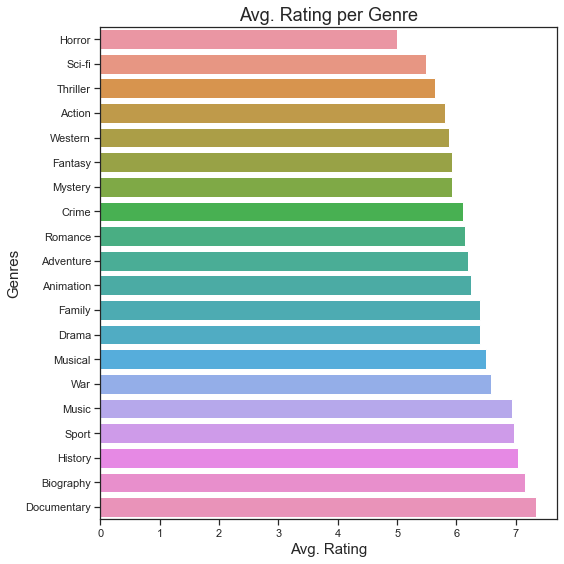

In [475]:
plt.figure(figsize=(8,8))
sns.barplot(x="Avg. Rating", y = "Genres", data=df1, errcolor='.95', order=df1.sort_values("Avg. Rating").Genres)
plt.xlabel("Avg. Rating", size=15)
plt.ylabel("Genres", size=15)
plt.title("Avg. Rating per Genre", size=18)
plt.tight_layout()
plt.savefig("barplot_Seaborn_Python.png", dpi=100)


**Is there a best combination of Genre and Investment to get the best rating?**

To answer that we are going to take the top 5 of Avg. Rating and pay attention to it's ROI on each genre!

> But for that we are going to divide the dataframe in 2, otherwise would be bad to visualize!

## Money per genre
- What is the best genre solely focused on how much money you can make?
- What genre is the "safest choice"? Less likely to lose money?
- What genre takes the least money to produce? And the most?


### - What is the best genre solely focused on how much money you can make?

In [347]:
df = pd.DataFrame({"ROI":avg_roi_per_genre, "Genres":listatest})

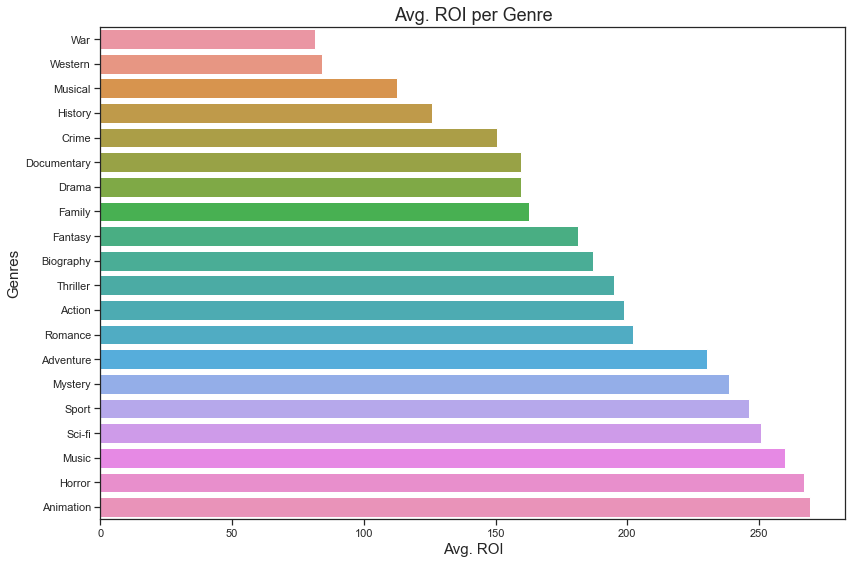

In [476]:
plt.figure(figsize=(12,8))
sns.barplot(x="ROI", y = "Genres", data=df, order=df.sort_values('ROI').Genres)
plt.xlabel("Avg. ROI", size=15)
plt.ylabel("Genres", size=15)
plt.title("Avg. ROI per Genre", size=18)
plt.tight_layout()
plt.savefig("barplot_Seaborn_Python.png", dpi=100)

The answer? Animation followed by Horror

### - What genre is the safest choice?

So we are going to create a new column that gives you a percentage of how likely you are to make or to lose money using the number of positive ROI's and the number of negative ROI's.

### - What genre takes the least and the most money to produce?


The idea is: If a big company, consolidated in the market already is starting to make movies, it might want to chose your strategy solely in the production costs. Because they might see it as a "Trial" or as a "Test" or it could go all-in knowing they have huge chances of making a good set of choices based on our team data together with the company name.

## Minutes per genre
- Are there genres that tend to last longer?
- Lasting longer gives the movies more chance to profit more? How about ratings?

### - Are there genres that tend to last longer?

### - Lasting longer gives the movies more chance to profit more? How about ratings?

In [ ]:
# sns.set_theme(style="ticks")

# # Initialize the figure with a logarithmic x axis
# f, ax = plt.subplots(figsize=(7, 10))
# ax.set_xscale("log")

# # Load the example planets dataset
# genre = sns.load_dataset("planets")

# # Plot the orbital period with horizontal boxes
# sns.boxplot(data=crime,
#             whis=[0, 100], width=.6)

# # Add in points to show each observation
# sns.stripplot(data=western,
#               size=4, color=".3", linewidth=0)

# # Tweak the visual presentation
# ax.xaxis.grid(True)
# ax.set(ylabel="")
# sns.despine(trim=True, left=True)

In [ ]:
# action = moviesfullinfo[moviesfullinfo['genres'].str.contains("Action")]
# adventure = moviesfullinfo[moviesfullinfo['genres'].str.contains("Adventure")]
# animation = moviesfullinfo[moviesfullinfo['genres'].str.contains("Animation")]
# biography = moviesfullinfo[moviesfullinfo['genres'].str.contains("Biography")]
# crime = moviesfullinfo[moviesfullinfo['genres'].str.contains("Crime")]
# documentary = moviesfullinfo[moviesfullinfo['genres'].str.contains("Documentary")]
# drama = moviesfullinfo[moviesfullinfo['genres'].str.contains("Drama")]
# family = moviesfullinfo[moviesfullinfo['genres'].str.contains("Family")]
# fantasy = moviesfullinfo[moviesfullinfo['genres'].str.contains("Fantasy")]
# history = moviesfullinfo[moviesfullinfo['genres'].str.contains("History")]
# horror = moviesfullinfo[moviesfullinfo['genres'].str.contains("Horror")]
# music = moviesfullinfo[moviesfullinfo['genres'].str.contains("Music")]
# musical = moviesfullinfo[moviesfullinfo['genres'].str.contains("Musical")]
# mystery = moviesfullinfo[moviesfullinfo['genres'].str.contains("Mystery")]
# romance = moviesfullinfo[moviesfullinfo['genres'].str.contains("Romance")]
# scifi = moviesfullinfo[moviesfullinfo['genres'].str.contains("Sci-Fi")]
# sport = moviesfullinfo[moviesfullinfo['genres'].str.contains("Sport")]
# thriller = moviesfullinfo[moviesfullinfo['genres'].str.contains("Thriller")]
# war = moviesfullinfo[moviesfullinfo['genres'].str.contains("War")]
# western = moviesfullinfo[moviesfullinfo['genres'].str.contains("Western")]


```python


intakes['event_num'] = intakes.sort_values(['intake_date']).groupby(['animal_id']).rank()
outcomes['event_num'] = outcomes.sort_values(['outcome_date']).groupby(['animal_id']).rank()
```

bus unde
data analysis
conclussion
data under
data prep
modeli
evaluation
deploy

2009 from 2019, treat 2020 as a special year